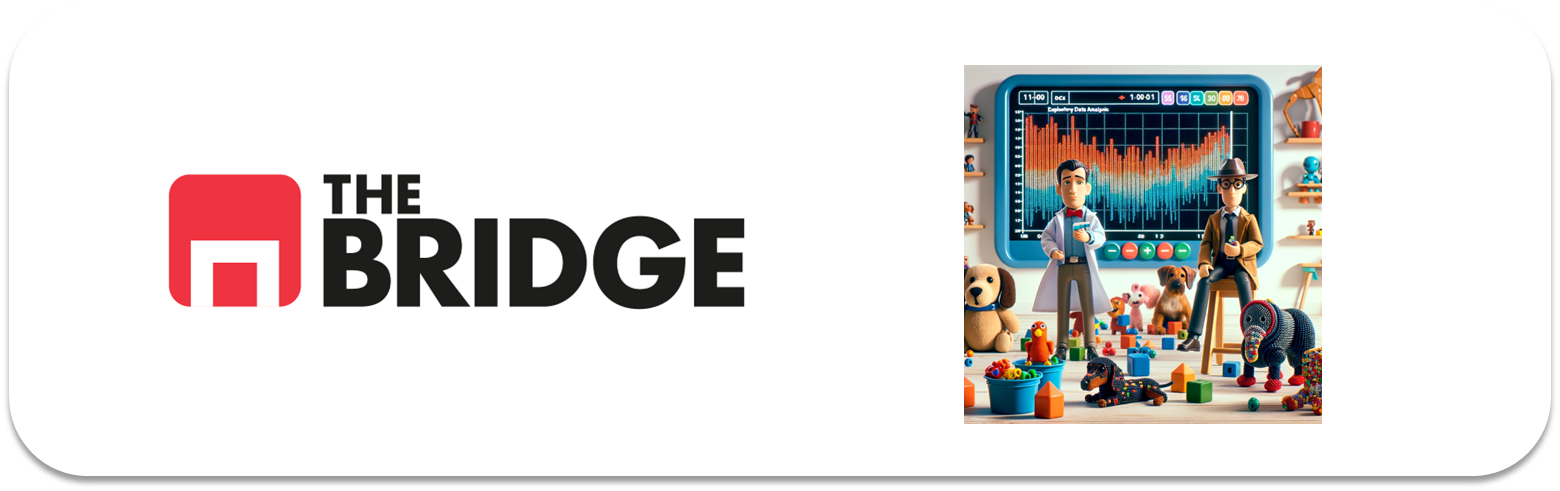

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:

# Importar las bibliotecas necesarias
import pandas as pd  # Para la manipulación y análisis de datos
import numpy as np  # Para operaciones matemáticas y manejo de arrays
import matplotlib.pyplot as plt  # Para visualización básica de gráficos
import seaborn as sns  # Para visualizaciones estadísticas avanzadas

# Configuración de estilo para gráficos
plt.style.use('ggplot')  # Usar el estilo "ggplot" para gráficos
sns.set(style="whitegrid")  # Configurar estilo de Seaborn

# Configuración para que las figuras se muestren con mayor claridad
plt.rcParams['figure.figsize'] = (10, 6)  # Tamaño de las figuras
plt.rcParams['axes.labelsize'] = 12  # Tamaño de las etiquetas de los ejes
plt.rcParams['axes.titlesize'] = 14  # Tamaño del título del gráfico

# Mensaje inicial para confirmar la importación
print("Módulos y paquetes importados correctamente.")

Módulos y paquetes importados correctamente.


In [2]:
import seaborn as sns

# Mostrar los nombres de todos los datasets disponibles en Seaborn
datasets_disponibles = sns.get_dataset_names()

print("Datasets disponibles en Seaborn:")
for dataset in datasets_disponibles:
    print(dataset)

Datasets disponibles en Seaborn:
anagrams
anscombe
attention
brain_networks
car_crashes
diamonds
dots
dowjones
exercise
flights
fmri
geyser
glue
healthexp
iris
mpg
penguins
planets
seaice
taxis
tips
titanic


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [3]:
import seaborn as sns

# Cargar el dataset Titanic desde seaborn
df_titanic = sns.load_dataset("titanic")

# Inspeccionar las primeras filas
print(df_titanic.head())

# Inspeccionar la estructura y tipos de datos
print(df_titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

In [5]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [7]:
# Importar las bibliotecas necesarias
import pandas as pd
import seaborn as sns

# Cargar el dataset Titanic desde seaborn
df_titanic = sns.load_dataset("titanic")

# Mostrar las primeras filas del DataFrame original
print("Primeras filas del DataFrame original:")
print(df_titanic.head())

# Mostrar la información general del DataFrame original
print("\nInformación del DataFrame original:")
print(df_titanic.info())

# Eliminar las columnas innecesarias
df_titanic_cleaned = df_titanic.drop(columns=["deck", "survived", "pclass", "embarked"])

# Mostrar las primeras filas del DataFrame limpio
print("\nPrimeras filas del DataFrame limpio:")
print(df_titanic_cleaned.head())

# Mostrar las columnas restantes en el DataFrame limpio
print("\nColumnas restantes en el DataFrame limpio:")
print(df_titanic_cleaned.columns)

# Mostrar un resumen estadístico del DataFrame limpio
print("\nResumen estadístico del DataFrame limpio:")
print(df_titanic_cleaned.describe(include='all'))

Primeras filas del DataFrame original:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Información del DataFrame original:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtyp

In [8]:
df_titanic_cleaned

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [9]:
# Crear la nueva columna "family_members" sumando "parch" y "sibsp"
df_titanic_cleaned["family_members"] = df_titanic_cleaned["parch"] + df_titanic_cleaned["sibsp"]

# Eliminar las columnas "parch" y "sibsp"
df_titanic_cleaned = df_titanic_cleaned.drop(columns=["parch", "sibsp"])

# Mostrar las primeras filas del DataFrame limpio con la nueva columna
print("Primeras filas del DataFrame con 'family_members':")
print(df_titanic_cleaned.head())

# Mostrar las columnas restantes en el DataFrame actualizado
print("\nColumnas restantes en el DataFrame limpio:")
print(df_titanic_cleaned.columns)

# Resumen estadístico del DataFrame limpio
print("\nResumen estadístico del DataFrame limpio:")
print(df_titanic_cleaned.describe(include='all'))

Primeras filas del DataFrame con 'family_members':
      sex   age     fare  class    who  adult_male  embark_town alive  alone  \
0    male  22.0   7.2500  Third    man        True  Southampton    no  False   
1  female  38.0  71.2833  First  woman       False    Cherbourg   yes  False   
2  female  26.0   7.9250  Third  woman       False  Southampton   yes   True   
3  female  35.0  53.1000  First  woman       False  Southampton   yes  False   
4    male  35.0   8.0500  Third    man        True  Southampton    no   True   

   family_members  
0               1  
1               1  
2               0  
3               1  
4               0  

Columnas restantes en el DataFrame limpio:
Index(['sex', 'age', 'fare', 'class', 'who', 'adult_male', 'embark_town',
       'alive', 'alone', 'family_members'],
      dtype='object')

Resumen estadístico del DataFrame limpio:
         sex         age        fare  class  who adult_male  embark_town  \
count    891  714.000000  891.000000    891  

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [10]:
# Imputar la moda en los valores nulos de "embark_town"
moda_embark_town = df_titanic_cleaned["embark_town"].mode()[0]
df_titanic_cleaned["embark_town"].fillna(moda_embark_town, inplace=True)

# Verificar que no queden valores nulos en "embark_town"
print("Valores nulos en 'embark_town' después de la imputación:")
print(df_titanic_cleaned["embark_town"].isnull().sum())

# Mostrar las primeras filas del DataFrame actualizado
print("\nPrimeras filas del DataFrame actualizado:")
print(df_titanic_cleaned.head())

Valores nulos en 'embark_town' después de la imputación:
0

Primeras filas del DataFrame actualizado:
      sex   age     fare  class    who  adult_male  embark_town alive  alone  \
0    male  22.0   7.2500  Third    man        True  Southampton    no  False   
1  female  38.0  71.2833  First  woman       False    Cherbourg   yes  False   
2  female  26.0   7.9250  Third  woman       False  Southampton   yes   True   
3  female  35.0  53.1000  First  woman       False  Southampton   yes  False   
4    male  35.0   8.0500  Third    man        True  Southampton    no   True   

   family_members  
0               1  
1               1  
2               0  
3               1  
4               0  


C:\Users\hp\AppData\Local\Temp\ipykernel_11812\648749508.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic_cleaned["embark_town"].fillna(moda_embark_town, inplace=True)


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [11]:
# Imputar la media a los valores nulos de "age"
# Método simple (sin considerar otras columnas)
media_age = df_titanic_cleaned["age"].mean()
df_titanic_cleaned["age"].fillna(media_age, inplace=True)

# Opción más precisa: Imputar la media según la categoría en "who"
# Calcular la media de edad para cada categoría de "who"
media_age_por_who = df_titanic_cleaned.groupby("who")["age"].transform("mean")

# Imputar los valores nulos en "age" con la media correspondiente según "who"
df_titanic_cleaned["age"] = df_titanic_cleaned["age"].fillna(media_age_por_who)

# Verificar que no queden valores nulos en "age"
print("Valores nulos en 'age' después de la imputación:")
print(df_titanic_cleaned["age"].isnull().sum())

# Mostrar las primeras filas del DataFrame actualizado
print("\nPrimeras filas del DataFrame actualizado con la imputación de 'age':")
print(df_titanic_cleaned.head())


Valores nulos en 'age' después de la imputación:
0

Primeras filas del DataFrame actualizado con la imputación de 'age':
      sex   age     fare  class    who  adult_male  embark_town alive  alone  \
0    male  22.0   7.2500  Third    man        True  Southampton    no  False   
1  female  38.0  71.2833  First  woman       False    Cherbourg   yes  False   
2  female  26.0   7.9250  Third  woman       False  Southampton   yes   True   
3  female  35.0  53.1000  First  woman       False  Southampton   yes  False   
4    male  35.0   8.0500  Third    man        True  Southampton    no   True   

   family_members  
0               1  
1               1  
2               0  
3               1  
4               0  


C:\Users\hp\AppData\Local\Temp\ipykernel_11812\1749130785.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic_cleaned["age"].fillna(media_age, inplace=True)


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

C:\Users\hp\AppData\Local\Temp\ipykernel_11812\4080684177.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic["age"].fillna(df_titanic.groupby("who")["age"].transform("mean"), inplace=True)



Supervivencia en términos absolutos (por 'who'):
who    alive
child  yes       49
       no        34
man    no       449
       yes       88
woman  yes      205
       no        66
Name: count, dtype: int64


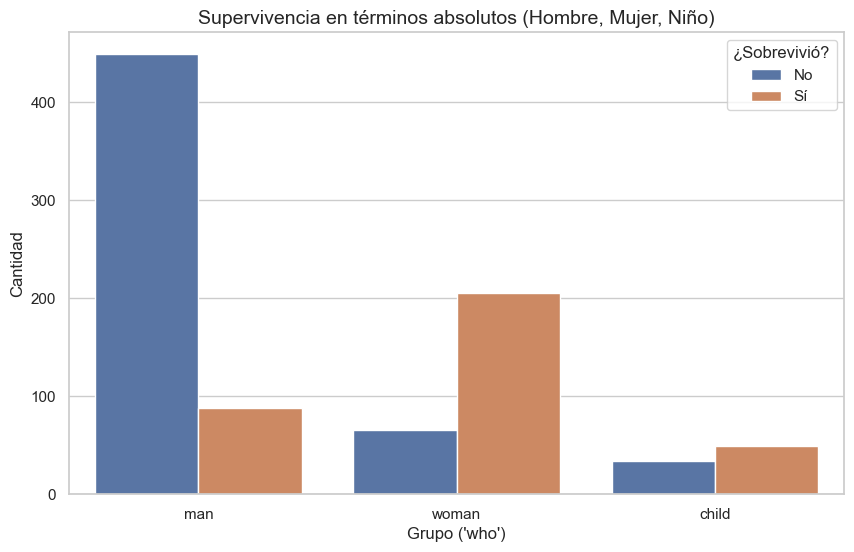


Supervivencia en términos relativos (por 'who'):
who    alive
child  yes      0.590361
       no       0.409639
man    no       0.836127
       yes      0.163873
woman  yes      0.756458
       no       0.243542
Name: proportion, dtype: float64


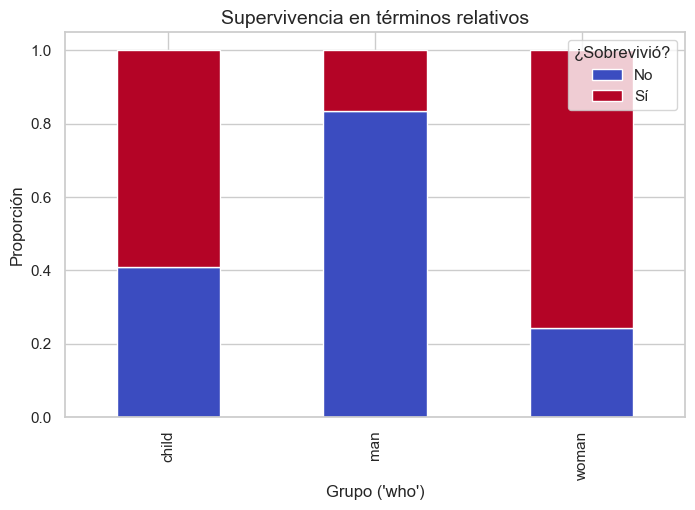


Tabla de contingencia (sexo vs. supervivencia):
alive    no  yes
sex             
female   81  233
male    468  109

Resultado del test Chi-cuadrado (sexo vs. supervivencia):
Chi-cuadrado: 260.71702016732104, p-valor: 1.1973570627755645e-58

Tabla de contingencia (quién es adulto o niño vs. supervivencia):
alive   no  yes
who            
child   34   49
man    449   88
woman   66  205

Resultado del test Chi-cuadrado (adulto/niño vs. supervivencia):
Chi-cuadrado: 283.923050324233, p-valor: 2.2227620817798914e-62


In [14]:
from scipy.stats import chi2_contingency  # Importar chi2_contingency para pruebas estadísticas
# Preprocesamiento: Imputar valores nulos
df_titanic["age"].fillna(df_titanic.groupby("who")["age"].transform("mean"), inplace=True)
df_titanic["embark_town"].fillna(df_titanic["embark_town"].mode()[0], inplace=True)
df_titanic["family_members"] = df_titanic["sibsp"] + df_titanic["parch"]

# Eliminar columnas innecesarias
df_titanic_cleaned = df_titanic.drop(columns=["deck", "survived", "pclass", "embarked", "parch", "sibsp"])

# Pregunta 1: En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños?
absolute_survival = df_titanic.groupby("who")["alive"].value_counts()
print("\nSupervivencia en términos absolutos (por 'who'):")
print(absolute_survival)

# Gráfico en términos absolutos
sns.countplot(data=df_titanic, x="who", hue="alive")
plt.title("Supervivencia en términos absolutos (Hombre, Mujer, Niño)")
plt.xlabel("Grupo ('who')")
plt.ylabel("Cantidad")
plt.legend(title="¿Sobrevivió?", labels=["No", "Sí"])
plt.show()

# Pregunta 2: En términos relativos, ¿quién sobrevivió más (hombres, mujeres, niños)?
relative_survival = df_titanic.groupby("who")["alive"].value_counts(normalize=True)
print("\nSupervivencia en términos relativos (por 'who'):")
print(relative_survival)

# Gráfico en términos relativos
df_relative = df_titanic.groupby("who")["alive"].value_counts(normalize=True).unstack()
df_relative.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(8, 5))
plt.title("Supervivencia en términos relativos")
plt.xlabel("Grupo ('who')")
plt.ylabel("Proporción")
plt.legend(title="¿Sobrevivió?", labels=["No", "Sí"])
plt.show()

# Pregunta 3: Relación entre sexo y supervivencia
sex_survival = pd.crosstab(df_titanic["sex"], df_titanic["alive"])
print("\nTabla de contingencia (sexo vs. supervivencia):")
print(sex_survival)

# Test de hipótesis (chi-cuadrado) para sexo y supervivencia
chi2_sex, p_sex, _, _ = chi2_contingency(sex_survival)
print(f"\nResultado del test Chi-cuadrado (sexo vs. supervivencia):")
print(f"Chi-cuadrado: {chi2_sex}, p-valor: {p_sex}")

# Pregunta 4: Relación entre ser adulto o niño y la supervivencia
who_survival = pd.crosstab(df_titanic["who"], df_titanic["alive"])
print("\nTabla de contingencia (quién es adulto o niño vs. supervivencia):")
print(who_survival)

# Test de hipótesis (chi-cuadrado) para adulto/niño y supervivencia
chi2_who, p_who, _, _ = chi2_contingency(who_survival)
print(f"\nResultado del test Chi-cuadrado (adulto/niño vs. supervivencia):")
print(f"Chi-cuadrado: {chi2_who}, p-valor: {p_who}")

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

C:\Users\hp\AppData\Local\Temp\ipykernel_11812\2977654779.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  absolute_survival_class = df_titanic.groupby("class")["alive"].value_counts()



Supervivencia en términos absolutos (por 'class'):
class   alive
First   yes      136
        no        80
Second  no        97
        yes       87
Third   no       372
        yes      119
Name: count, dtype: int64


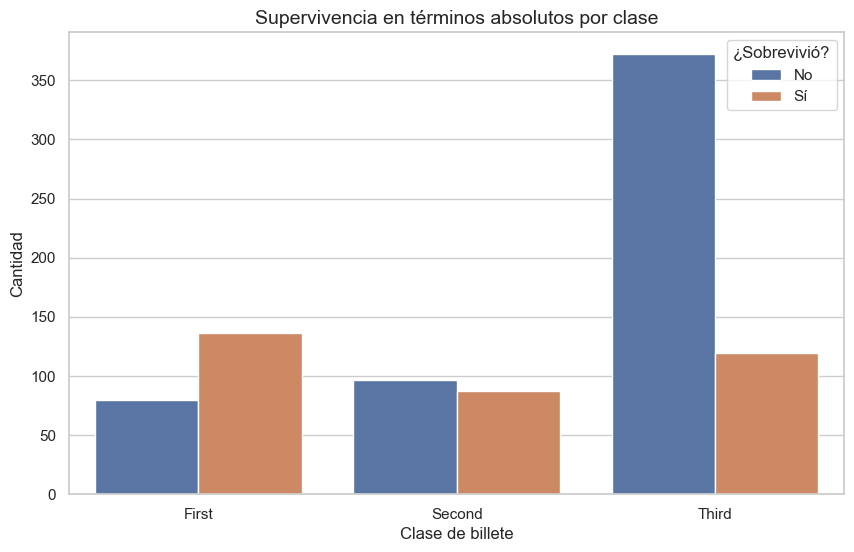

C:\Users\hp\AppData\Local\Temp\ipykernel_11812\2977654779.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  relative_survival_class = df_titanic.groupby("class")["alive"].value_counts(normalize=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_11812\2977654779.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_relative_class = df_titanic.groupby("class")["alive"].value_counts(normalize=True).unstack()



Supervivencia en términos relativos (por 'class'):
class   alive
First   yes      0.629630
        no       0.370370
Second  no       0.527174
        yes      0.472826
Third   no       0.757637
        yes      0.242363
Name: proportion, dtype: float64


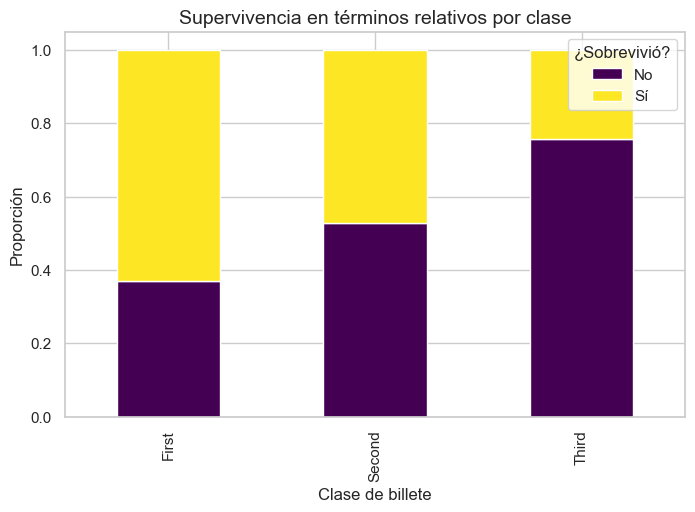


Tabla de contingencia (clase vs. supervivencia):
alive    no  yes
class           
First    80  136
Second   97   87
Third   372  119

Resultado del test Chi-cuadrado (clase vs. supervivencia):
Chi-cuadrado: 102.88898875696056, p-valor: 4.549251711298793e-23


In [15]:
# Eliminar columnas innecesarias
df_titanic_cleaned = df_titanic.drop(columns=["deck", "survived", "pclass", "embarked", "parch", "sibsp"])

# Pregunta 1: En términos absolutos, ¿de qué clase sobrevivieron más pasajeros?
absolute_survival_class = df_titanic.groupby("class")["alive"].value_counts()
print("\nSupervivencia en términos absolutos (por 'class'):")
print(absolute_survival_class)

# Gráfico en términos absolutos
sns.countplot(data=df_titanic, x="class", hue="alive", order=["First", "Second", "Third"])
plt.title("Supervivencia en términos absolutos por clase")
plt.xlabel("Clase de billete")
plt.ylabel("Cantidad")
plt.legend(title="¿Sobrevivió?", labels=["No", "Sí"])
plt.show()

# Pregunta 2: En términos relativos, ¿qué clase sobrevivió más?
relative_survival_class = df_titanic.groupby("class")["alive"].value_counts(normalize=True)
print("\nSupervivencia en términos relativos (por 'class'):")
print(relative_survival_class)

# Gráfico en términos relativos
df_relative_class = df_titanic.groupby("class")["alive"].value_counts(normalize=True).unstack()
df_relative_class.plot(kind="bar", stacked=True, colormap="viridis", figsize=(8, 5))
plt.title("Supervivencia en términos relativos por clase")
plt.xlabel("Clase de billete")
plt.ylabel("Proporción")
plt.legend(title="¿Sobrevivió?", labels=["No", "Sí"])
plt.show()

# Pregunta 3: ¿Existe alguna relación estadísticamente significativa entre la clase y la supervivencia?
class_survival = pd.crosstab(df_titanic["class"], df_titanic["alive"])
print("\nTabla de contingencia (clase vs. supervivencia):")
print(class_survival)

# Test de hipótesis (chi-cuadrado) para clase y supervivencia
chi2_class, p_class, _, _ = chi2_contingency(class_survival)
print(f"\nResultado del test Chi-cuadrado (clase vs. supervivencia):")
print(f"Chi-cuadrado: {chi2_class}, p-valor: {p_class}")

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?



Supervivencia en términos absolutos por ciudad de embarque:
embark_town  alive
Cherbourg    yes       93
             no        75
Queenstown   no        47
             yes       30
Southampton  no       427
             yes      219
Name: count, dtype: int64


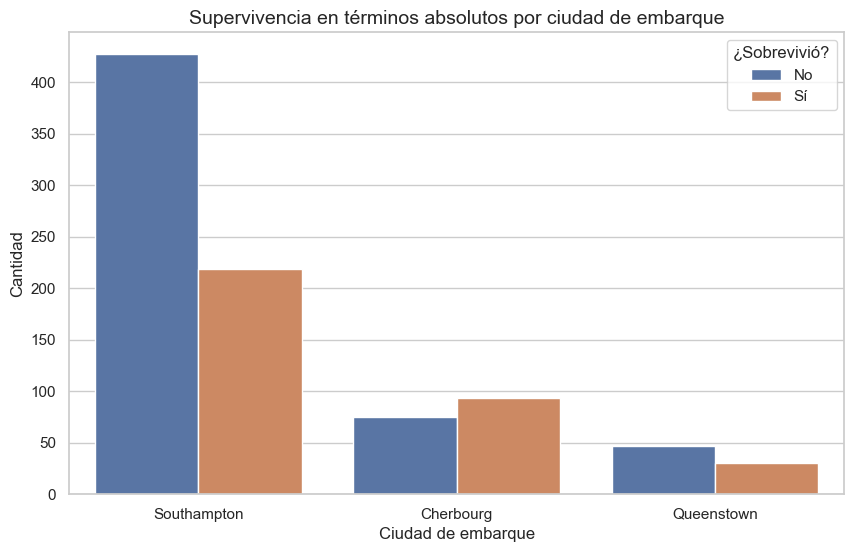


Supervivencia en términos relativos por ciudad de embarque:
embark_town  alive
Cherbourg    yes      0.553571
             no       0.446429
Queenstown   no       0.610390
             yes      0.389610
Southampton  no       0.660991
             yes      0.339009
Name: proportion, dtype: float64


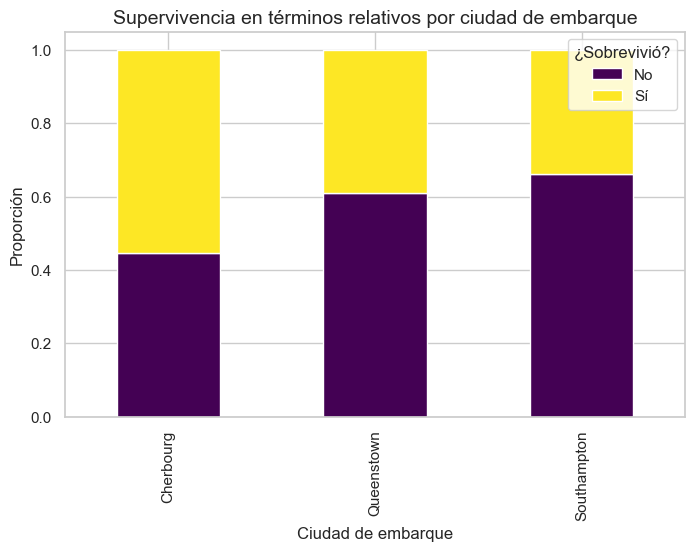


Tabla de contingencia (ciudad de embarque vs. supervivencia):
alive         no  yes
embark_town          
Cherbourg     75   93
Queenstown    47   30
Southampton  427  219

Resultado del test Chi-cuadrado (ciudad de embarque vs. supervivencia):
Chi-cuadrado: 25.964452881874784, p-valor: 2.3008626481449577e-06


In [16]:
# Pregunta 1: ¿De qué ciudad sobrevivieron más personas en términos absolutos?
absolute_survival_city = df_titanic.groupby("embark_town")["alive"].value_counts()
print("\nSupervivencia en términos absolutos por ciudad de embarque:")
print(absolute_survival_city)

# Gráfico en términos absolutos
sns.countplot(data=df_titanic, x="embark_town", hue="alive", order=df_titanic["embark_town"].unique())
plt.title("Supervivencia en términos absolutos por ciudad de embarque")
plt.xlabel("Ciudad de embarque")
plt.ylabel("Cantidad")
plt.legend(title="¿Sobrevivió?", labels=["No", "Sí"])
plt.show()

# Pregunta 2: ¿De qué ciudad sobrevivieron más personas en términos relativos?
relative_survival_city = df_titanic.groupby("embark_town")["alive"].value_counts(normalize=True)
print("\nSupervivencia en términos relativos por ciudad de embarque:")
print(relative_survival_city)

# Gráfico en términos relativos
df_relative_city = df_titanic.groupby("embark_town")["alive"].value_counts(normalize=True).unstack()
df_relative_city.plot(kind="bar", stacked=True, colormap="viridis", figsize=(8, 5))
plt.title("Supervivencia en términos relativos por ciudad de embarque")
plt.xlabel("Ciudad de embarque")
plt.ylabel("Proporción")
plt.legend(title="¿Sobrevivió?", labels=["No", "Sí"])
plt.show()

# Pregunta 3: ¿Existe una relación estadísticamente significativa entre la ciudad de embarque y la supervivencia?
city_survival = pd.crosstab(df_titanic["embark_town"], df_titanic["alive"])
print("\nTabla de contingencia (ciudad de embarque vs. supervivencia):")
print(city_survival)

# Test de hipótesis (chi-cuadrado) para ciudad de embarque y supervivencia
chi2_city, p_city, _, _ = chi2_contingency(city_survival)
print(f"\nResultado del test Chi-cuadrado (ciudad de embarque vs. supervivencia):")
print(f"Chi-cuadrado: {chi2_city}, p-valor: {p_city}")

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

C:\Users\hp\AppData\Local\Temp\ipykernel_11812\4096651063.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_titanic, x="alive", y="fare", palette="coolwarm")


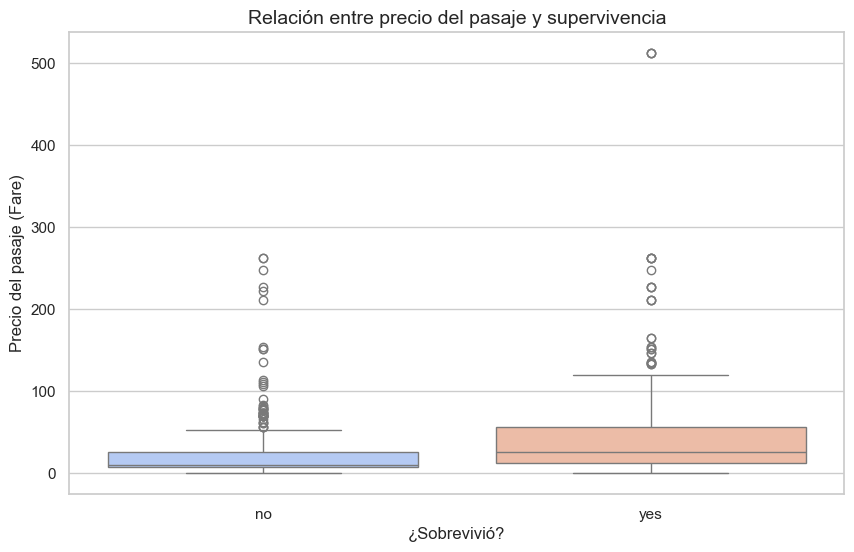


Media del precio del pasaje (Fare) - Sobrevivientes: 48.40
Media del precio del pasaje (Fare) - Fallecidos: 22.12

Prueba t entre precios del pasaje de sobrevivientes y fallecidos:
Estadístico t: 6.84, p-valor: 0.00000


In [18]:
from scipy.stats import ttest_ind
# Pregunta 1: Visualizar la relación entre el precio del pasaje y la supervivencia
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_titanic, x="alive", y="fare", palette="coolwarm")
plt.title("Relación entre precio del pasaje y supervivencia")
plt.xlabel("¿Sobrevivió?")
plt.ylabel("Precio del pasaje (Fare)")
plt.show()

# Pregunta 2: Comparar las medias del precio del pasaje entre sobrevivientes y fallecidos
fare_survived = df_titanic[df_titanic["alive"] == "yes"]["fare"]
fare_not_survived = df_titanic[df_titanic["alive"] == "no"]["fare"]

mean_fare_survived = fare_survived.mean()
mean_fare_not_survived = fare_not_survived.mean()

print(f"\nMedia del precio del pasaje (Fare) - Sobrevivientes: {mean_fare_survived:.2f}")
print(f"Media del precio del pasaje (Fare) - Fallecidos: {mean_fare_not_survived:.2f}")

# Test estadístico: Prueba t para comparar medias
t_stat, p_value = ttest_ind(fare_survived, fare_not_survived, equal_var=False)
print(f"\nPrueba t entre precios del pasaje de sobrevivientes y fallecidos:")
print(f"Estadístico t: {t_stat:.2f}, p-valor: {p_value:.5f}")

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

In [19]:
# Identificar pasajeros que no pagaron el billete (fare == 0)
no_fare_passengers = df_titanic[df_titanic["fare"] == 0]
print("\nPasajeros que no pagaron el billete:")
print(no_fare_passengers)

# Analizar al pasajero que pagó el billete más caro
max_fare = df_titanic["fare"].max()
passenger_max_fare = df_titanic[df_titanic["fare"] == max_fare]
print("\nDetalles del pasajero que pagó el billete más caro:")
print(passenger_max_fare)


Pasajeros que no pagaron el billete:
     survived  pclass   sex        age  sibsp  parch  fare embarked   class  \
179         0       3  male  36.000000      0      0   0.0        S   Third   
263         0       1  male  40.000000      0      0   0.0        S   First   
271         1       3  male  25.000000      0      0   0.0        S   Third   
277         0       2  male  33.173123      0      0   0.0        S  Second   
302         0       3  male  19.000000      0      0   0.0        S   Third   
413         0       2  male  33.173123      0      0   0.0        S  Second   
466         0       2  male  33.173123      0      0   0.0        S  Second   
481         0       2  male  33.173123      0      0   0.0        S  Second   
597         0       3  male  49.000000      0      0   0.0        S   Third   
633         0       1  male  33.173123      0      0   0.0        S   First   
674         0       2  male  33.173123      0      0   0.0        S  Second   
732         0 

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.



Promedio de tarifa por ciudad de embarque y supervivencia:
   embark_town alive       fare
0    Cherbourg    no  35.443335
1    Cherbourg   yes  79.720926
2   Queenstown    no  13.335904
3   Queenstown   yes  13.182227
4  Southampton    no  20.743987
5  Southampton   yes  39.916514


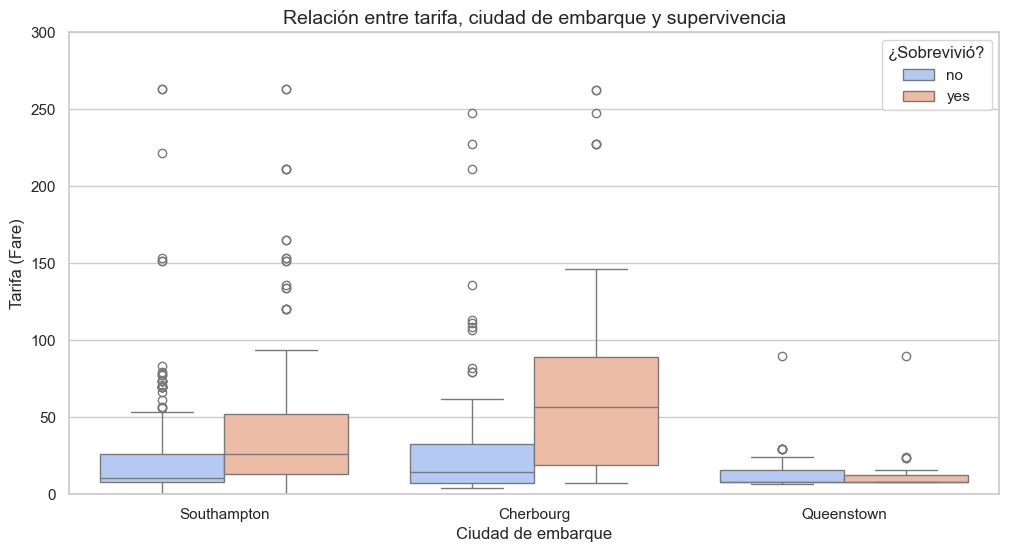

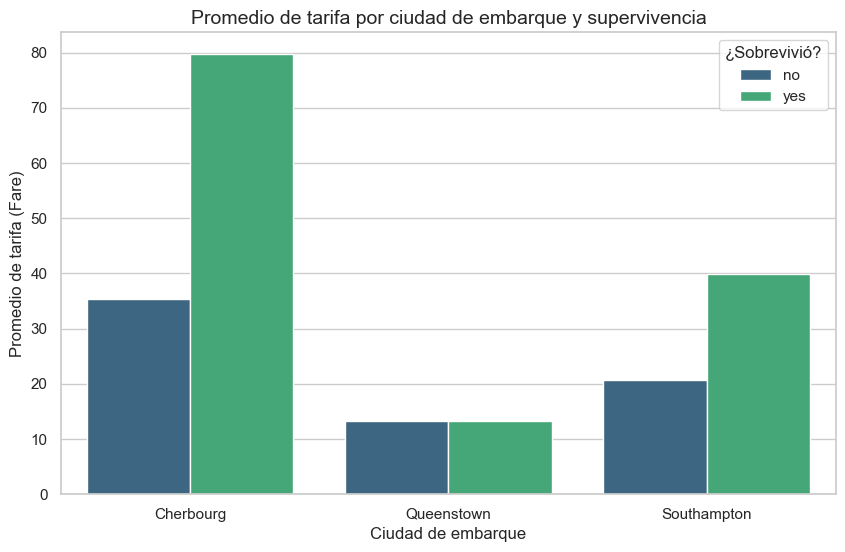

In [20]:
# Resumen numérico: Promedio de tarifa por ciudad de embarque y supervivencia
fare_summary = df_titanic.groupby(["embark_town", "alive"])["fare"].mean().reset_index()
print("\nPromedio de tarifa por ciudad de embarque y supervivencia:")
print(fare_summary)

# Gráfico 1: Boxplot para visualizar la relación entre 'fare', 'embark_town' y 'alive'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_titanic, x="embark_town", y="fare", hue="alive", palette="coolwarm")
plt.title("Relación entre tarifa, ciudad de embarque y supervivencia")
plt.xlabel("Ciudad de embarque")
plt.ylabel("Tarifa (Fare)")
plt.ylim(0, 300)  # Ajustar para enfocarse en datos relevantes
plt.legend(title="¿Sobrevivió?")
plt.show()

# Gráfico 2: Barras para visualizar el promedio de tarifa por ciudad y supervivencia
plt.figure(figsize=(10, 6))
sns.barplot(data=fare_summary, x="embark_town", y="fare", hue="alive", palette="viridis")
plt.title("Promedio de tarifa por ciudad de embarque y supervivencia")
plt.xlabel("Ciudad de embarque")
plt.ylabel("Promedio de tarifa (Fare)")
plt.legend(title="¿Sobrevivió?")
plt.show()

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. 
¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

C:\Users\hp\AppData\Local\Temp\ipykernel_11812\779838218.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  absolute_survival = df_titanic[df_titanic["alive"] == "yes"].groupby(["class", "age_group"]).size().reset_index(name="count")
C:\Users\hp\AppData\Local\Temp\ipykernel_11812\779838218.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  relative_survival = df_titanic.groupby(["class", "age_group"])["alive"].value_counts(normalize=True).unstack()["yes"].reset_index(name="relative_survival")



Supervivencia absoluta por clase y grupo de edad:
     class     age_group  count
0    First         Niños      3
1    First  Adolescentes     11
2    First       Jóvenes     64
3    First       Adultos     40
4    First       Mayores     18
5   Second         Niños     17
6   Second  Adolescentes      6
7   Second       Jóvenes     45
8   Second       Adultos     16
9   Second       Mayores      3
10   Third         Niños     20
11   Third  Adolescentes     13
12   Third       Jóvenes     80
13   Third       Adultos      5
14   Third       Mayores      1

Supervivencia relativa por clase y grupo de edad:
     class     age_group  relative_survival
0    First         Niños           0.750000
1    First  Adolescentes           0.916667
2    First       Jóvenes           0.666667
3    First       Adultos           0.615385
4    First       Mayores           0.461538
5   Second         Niños           1.000000
6   Second  Adolescentes           0.500000
7   Second       Jóvenes          

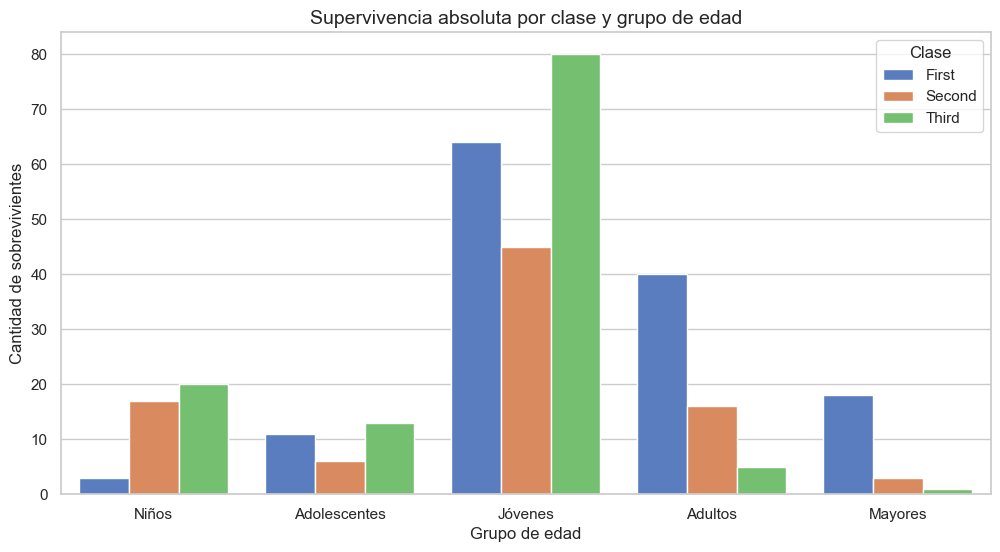

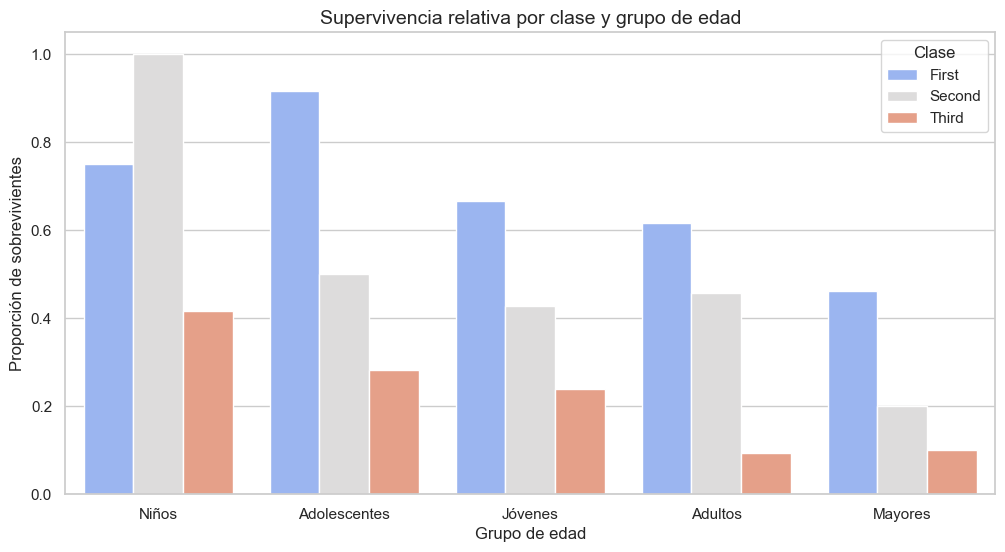

In [21]:
# Crear grupos de edad
bins = [0, 12, 18, 35, 50, 80]  # Definir rangos de edad
labels = ["Niños", "Adolescentes", "Jóvenes", "Adultos", "Mayores"]
df_titanic["age_group"] = pd.cut(df_titanic["age"], bins=bins, labels=labels)

# Resumen absoluto: Cantidad de sobrevivientes por clase y grupo de edad
absolute_survival = df_titanic[df_titanic["alive"] == "yes"].groupby(["class", "age_group"]).size().reset_index(name="count")
print("\nSupervivencia absoluta por clase y grupo de edad:")
print(absolute_survival)

# Resumen relativo: Proporción de sobrevivientes dentro de cada grupo de clase y edad
relative_survival = df_titanic.groupby(["class", "age_group"])["alive"].value_counts(normalize=True).unstack()["yes"].reset_index(name="relative_survival")
print("\nSupervivencia relativa por clase y grupo de edad:")
print(relative_survival)

# Gráfico 1: Supervivencia absoluta por clase y grupo de edad
plt.figure(figsize=(12, 6))
sns.barplot(data=absolute_survival, x="age_group", y="count", hue="class", palette="muted")
plt.title("Supervivencia absoluta por clase y grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Cantidad de sobrevivientes")
plt.legend(title="Clase")
plt.show()

# Gráfico 2: Supervivencia relativa por clase y grupo de edad
plt.figure(figsize=(12, 6))
sns.barplot(data=relative_survival, x="age_group", y="relative_survival", hue="class", palette="coolwarm")
plt.title("Supervivencia relativa por clase y grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Proporción de sobrevivientes")
plt.legend(title="Clase")
plt.show()


8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

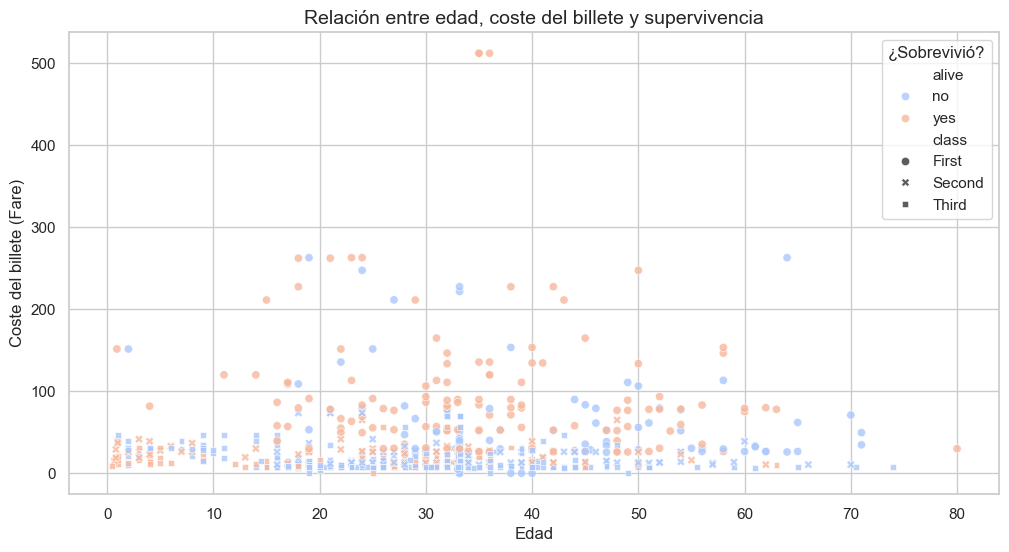

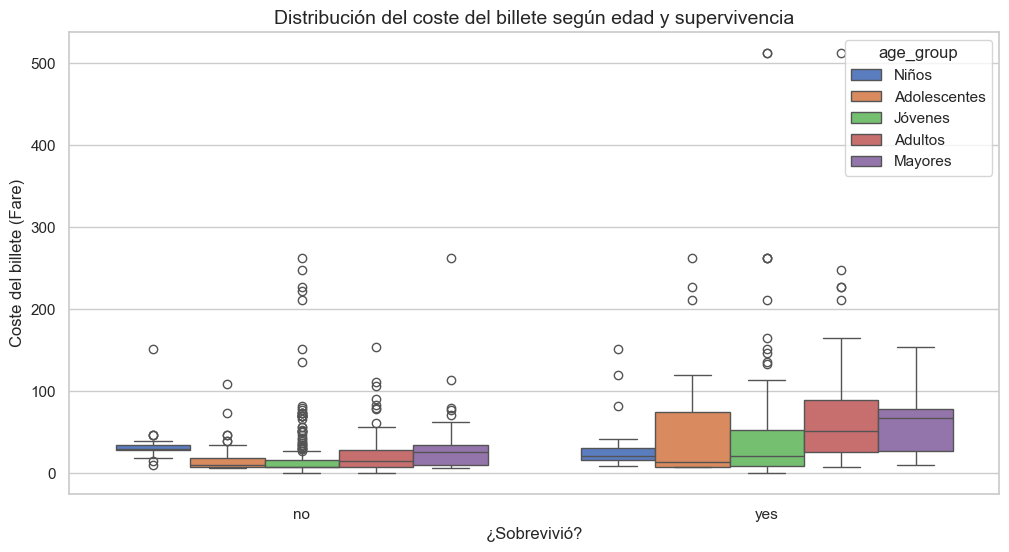

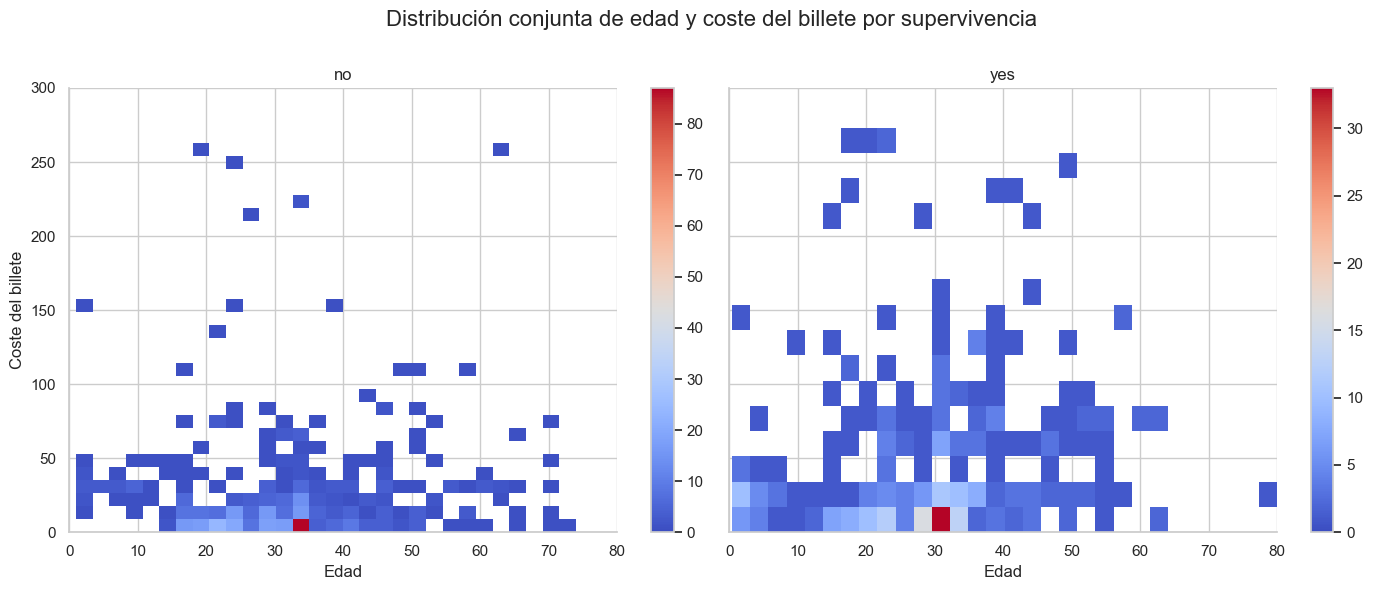

In [22]:
# Gráfico 1: Relación entre edad, coste del billete y supervivencia
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_titanic, x="age", y="fare", hue="alive", style="class", palette="coolwarm", alpha=0.8)
plt.title("Relación entre edad, coste del billete y supervivencia")
plt.xlabel("Edad")
plt.ylabel("Coste del billete (Fare)")
plt.legend(title="¿Sobrevivió?")
plt.show()

# Gráfico 2: Boxplot de tarifas por edad y supervivencia
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_titanic, x="alive", y="fare", hue="age_group", palette="muted")
plt.title("Distribución del coste del billete según edad y supervivencia")
plt.xlabel("¿Sobrevivió?")
plt.ylabel("Coste del billete (Fare)")
plt.show()

# Gráfico 3: Distribución conjunta de edad y coste del billete, diferenciada por supervivencia
g = sns.FacetGrid(df_titanic, col="alive", height=6, aspect=1.2)
g.map(sns.histplot, "age", "fare", cmap="coolwarm", bins=30, cbar=True)
g.set_axis_labels("Edad", "Coste del billete")
g.set_titles("{col_name}").set(ylim=(0, 300), xlim=(0, 80))
plt.subplots_adjust(top=0.85)
plt.suptitle("Distribución conjunta de edad y coste del billete por supervivencia", size=16)
plt.show()

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [25]:
# Ruta del archivo
ruta_archivo = r"C:\Users\hp\Desktop\Python Scripts\dataset_viajes_jul23.csv"

# Cargar el archivo CSV en un DataFrame con la codificación especificada
try:
    df_viajes_junio = pd.read_csv(ruta_archivo, encoding="latin1")  # Cambiar encoding si es necesario
except UnicodeDecodeError:
    df_viajes_junio = pd.read_csv(ruta_archivo, encoding="ISO-8859-1")  # Alternativa si latin1 falla

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset de viajes de junio:")
print(df_viajes_junio.head())

# Mostrar información general del dataset
print("\nInformación general del dataset:")
print(df_viajes_junio.info())

Primeras filas del dataset de viajes de junio:
  aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0  PamPangea,Nueva York,Londres,5566,Airbus A320,...                                            
1  TabarAir,Cincinnati,Los Angeles,3073,Airbus A3...                                            
2  FlyQ,Barcelona,Roma,859,Boeing 747,False,9248....                                            
3  PamPangea,Ginebra,Bali,12383,Boeing 747,False,...                                            
4  MoldaviAir,Cádiz,Bali,12798,Airbus A380,False,...                                            

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 1 columns):
 #   Column                                                                                          Non-Null Count  Dtype 
---  ------                                                                                          --------

In [26]:
df_viajes_junio

,"aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes"
0,"PamPangea,Nueva York,Londres,5566,Airbus A320,..."
1,"TabarAir,Cincinnati,Los Angeles,3073,Airbus A3..."
2,"FlyQ,Barcelona,Roma,859,Boeing 747,False,9248...."
3,"PamPangea,Ginebra,Bali,12383,Boeing 747,False,..."
4,"MoldaviAir,Cádiz,Bali,12798,Airbus A380,False,..."
...,...
595,"TabarAir,Los Angeles,Londres,8785,Airbus A320,..."
596,"MoldaviAir,Cincinnati,Londres,6284,Boeing 737,..."
597,"FlyQ,Roma,Cincinnati,7480,Airbus A320,True,197..."
598,"TabarAir,Roma,Londres,1433,Boeing 747,False,15..."


In [36]:
df_viajes_junio.columns

Index(['aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes'], dtype='object')

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

In [39]:
import pandas as pd

# Ruta del archivo
ruta_archivo = r"C:\Users\hp\Desktop\Python Scripts\dataset_viajes_jul23.csv"

# Cargar el archivo sin encabezado para trabajar con la única columna comprimida
df_viajes_junio = pd.read_csv(ruta_archivo, encoding="latin1", header=None)

# Verificar la primera fila para detectar el separador
print("Primera fila del dataset:")
print(df_viajes_junio.iloc[0, 0])  # Mostrar la primera fila

# Separar las columnas con el separador correcto (coma en este caso)
df_viajes_junio = df_viajes_junio[0].str.split(",", expand=True)

# Asignar nombres de columnas
df_viajes_junio.columns = [
    "aircompany", "origen", "destino", "distancia", "avion",
    "con_escala", "consumo_kg", "duracion", "ingresos", "id_vuelo", "mes"
]

# Convertir las columnas relevantes a valores numéricos
df_viajes_junio["distancia"] = pd.to_numeric(df_viajes_junio["distancia"], errors="coerce")
df_viajes_junio["consumo_kg"] = pd.to_numeric(df_viajes_junio["consumo_kg"], errors="coerce")
df_viajes_junio["ingresos"] = pd.to_numeric(df_viajes_junio["ingresos"], errors="coerce")

# Verificar que las columnas estén organizadas
print("\nColumnas organizadas:")
print(df_viajes_junio.head())

# Mostrar información general del DataFrame
print("\nInformación general del DataFrame:")
print(df_viajes_junio.info())

Primera fila del dataset:
aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes

Columnas organizadas:
   aircompany      origen      destino  distancia        avion  con_escala  \
0  aircompany      origen      destino        NaN        avion  con_escala   
1   PamPangea  Nueva York      Londres     5566.0  Airbus A320        True   
2    TabarAir  Cincinnati  Los Angeles     3073.0  Airbus A380       False   
3        FlyQ   Barcelona         Roma      859.0   Boeing 747       False   
4   PamPangea     Ginebra         Bali    12383.0   Boeing 747       False   

     consumo_kg  duracion   ingresos        id_vuelo    mes  
0           NaN  duracion        NaN        id_vuelo    mes  
1   15255.96072       523  220563.17  Pam_NuLo_11320  Jul23  
2   36234.35760       224  192311.81  Tab_CiLo_11380  Jul23  
3    9248.50940        77   52866.89  Fly_BaRo_10747  Jul23  
4  138602.91900       845  723138.29  Pam_GiBa_10747  Jul23  

Información ge

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

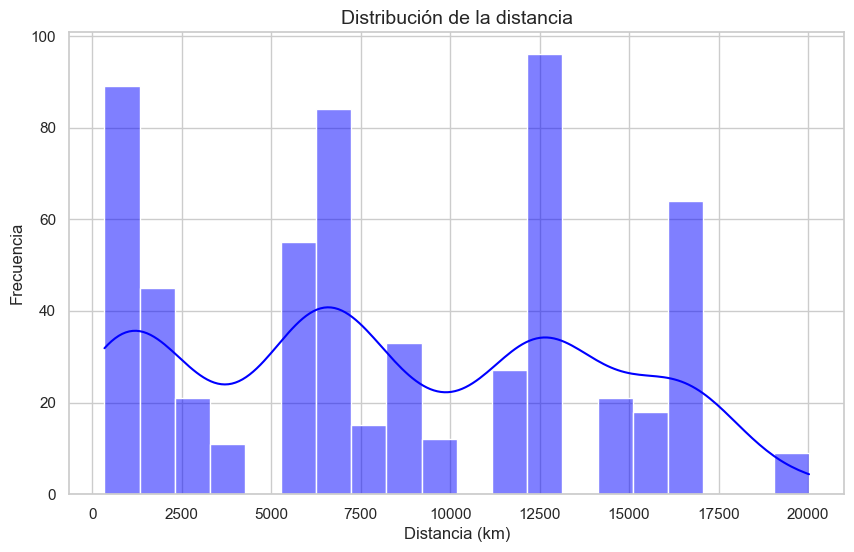


Distribución de la variable 'cat_vuelo':
cat_vuelo
Muy Larga    240
Larga        194
Corta        134
Media         32
Name: count, dtype: int64


In [40]:
# Paso 1: Analizar la distribución de "distancia"
plt.figure(figsize=(10, 6))
sns.histplot(df_viajes_junio["distancia"], bins=20, kde=True, color="blue")
plt.title("Distribución de la distancia")
plt.xlabel("Distancia (km)")
plt.ylabel("Frecuencia")
plt.show()

# Paso 2: Crear categorías basadas en la distribución
bins = [0, 2000, 5000, 10000, df_viajes_junio["distancia"].max()]  # Rangos sugeridos
labels = ["Corta", "Media", "Larga", "Muy Larga"]  # Nombres de las categorías
df_viajes_junio["cat_vuelo"] = pd.cut(df_viajes_junio["distancia"], bins=bins, labels=labels, include_lowest=True)

# Verificar las categorías
print("\nDistribución de la variable 'cat_vuelo':")
print(df_viajes_junio["cat_vuelo"].value_counts())

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.

Columnas del DataFrame:
Index(['aircompany', 'origen', 'destino', 'distancia', 'avion', 'con_escala',
       'consumo_kg', 'duracion', 'ingresos', 'id_vuelo', 'mes', 'cat_vuelo',
       'ingreso_kg', 'kg_km', 'eficiencia'],
      dtype='object')


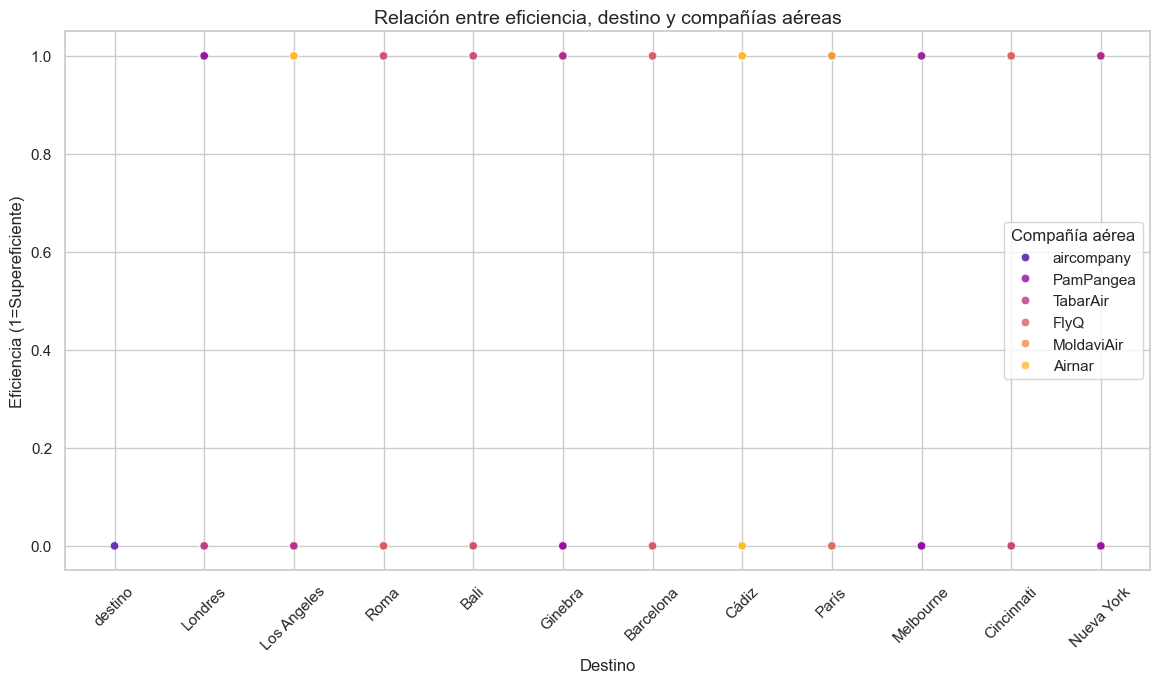

In [42]:
# Verificar si la columna "eficiencia" existe en el DataFrame
if "eficiencia" not in df_viajes_junio.columns:
    # Si no existe, recalcular la columna "eficiencia"
    df_viajes_junio["ingreso_kg"] = df_viajes_junio["ingresos"] / df_viajes_junio["consumo_kg"]
    df_viajes_junio["kg_km"] = df_viajes_junio["consumo_kg"] / df_viajes_junio["distancia"]

    # Definir umbrales para eficiencia
    umbral_ingreso_kg = df_viajes_junio["ingreso_kg"].quantile(0.75)  # 75% más alto
    umbral_kg_km = df_viajes_junio["kg_km"].quantile(0.25)  # 25% más bajo

    # Crear variable binaria de eficiencia
    df_viajes_junio["eficiencia"] = (
        (df_viajes_junio["ingreso_kg"] >= umbral_ingreso_kg) &
        (df_viajes_junio["kg_km"] <= umbral_kg_km)
    ).astype(int)

# Verificar la estructura del DataFrame
print("Columnas del DataFrame:")
print(df_viajes_junio.columns)

# Multivariante: Relación entre compañía, eficiencia y destino
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_viajes_junio, x="destino", y="eficiencia", hue="aircompany", palette="plasma", alpha=0.8)
plt.title("Relación entre eficiencia, destino y compañías aéreas")
plt.xlabel("Destino")
plt.ylabel("Eficiencia (1=Supereficiente)")
plt.xticks(rotation=45)
plt.legend(title="Compañía aérea")
plt.show()
